In [19]:
from models.ml_basic_inference import predict_custom_input
from models.ml_sequential_inference import predict_custom_input_sequential
import matplotlib.pyplot as plt

# Ignore warnings to prevent
# UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
import warnings
warnings.filterwarnings("ignore")

female = 0
age = 70
height = 170
mass = 70
ta_set = 35
rh_set = 45

In [20]:
def sensitivity_analysis(variable, values):
    results_basic = []
    results_sequential = []

    for value in values:
        if variable == 'female':
            tre, mtsk = predict_custom_input(value, age, height, mass, ta_set, rh_set)
            tre_seq, mtsk_seq = predict_custom_input_sequential(value, age, height, mass, ta_set, rh_set)
        elif variable == 'age':
            tre, mtsk = predict_custom_input(female, value, height, mass, ta_set, rh_set)
            tre_seq, mtsk_seq = predict_custom_input_sequential(female, value, height, mass, ta_set, rh_set)
        elif variable == 'height':
            tre, mtsk = predict_custom_input(female, age, value, mass, ta_set, rh_set)
            tre_seq, mtsk_seq = predict_custom_input_sequential(female, age, value, mass, ta_set, rh_set)
        elif variable == 'mass':
            tre, mtsk = predict_custom_input(female, age, height, value, ta_set, rh_set)
            tre_seq, mtsk_seq = predict_custom_input_sequential(female, age, height, value, ta_set, rh_set)
        elif variable == 'ta_set':
            tre, mtsk = predict_custom_input(female, age, height, mass, value, rh_set)
            tre_seq, mtsk_seq = predict_custom_input_sequential(female, age, height, mass, value, rh_set)
        elif variable == 'rh_set':
            tre, mtsk = predict_custom_input(female, age, height, mass, ta_set, value)
            tre_seq, mtsk_seq = predict_custom_input_sequential(female, age, height, mass, ta_set, value)

        results_basic.append((tre, mtsk))
        results_sequential.append((tre_seq, mtsk_seq))

    fig, ax = plt.subplots()

    for i, value in enumerate(values):
        tre_basic, mtsk_basic = results_basic[i]
        tre_seq, mtsk_seq = results_sequential[i]

        ax.plot(value, tre_basic, 'bo', label='Ridge Regression (Core)' if i == 0 else None)
        ax.plot(value, mtsk_basic, 'bx', label='Ridge Regression (Skin)' if i == 0 else None)
        ax.plot(value, tre_seq, 'ro', label='Sequential (Core)' if i == 0 else None)
        ax.plot(value, mtsk_seq, 'rx', label='Sequential (Skin)' if i == 0 else None)

    ax.set_xlabel(variable)
    ax.set_ylabel('Final Temperature (°C)')
    ax.legend()
    plt.show()

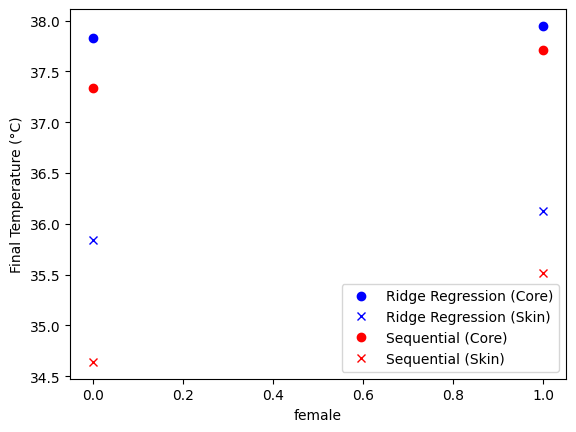

In [22]:
sensitivity_analysis('female', [0, 1])

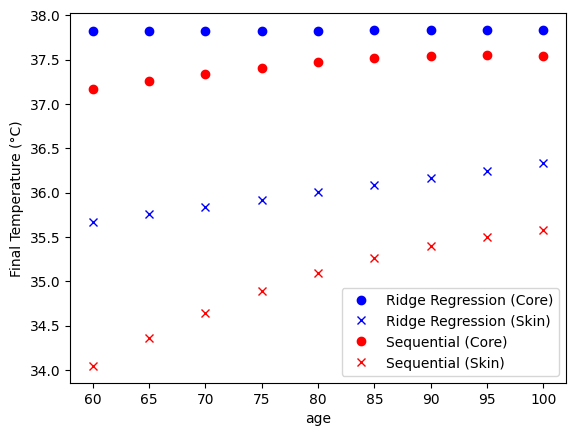

In [23]:
sensitivity_analysis('age', [60, 65, 70, 75, 80, 85, 90, 95, 100])

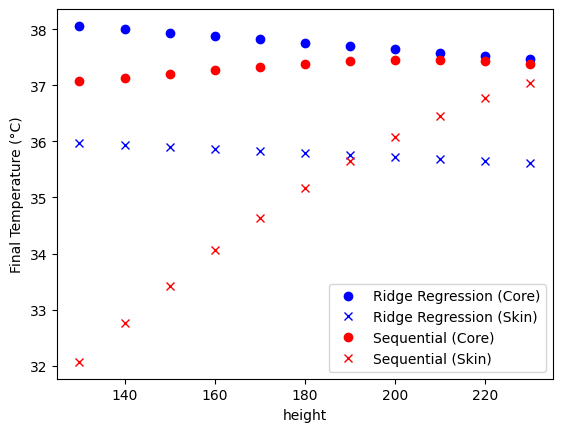

In [25]:
sensitivity_analysis('height', [130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

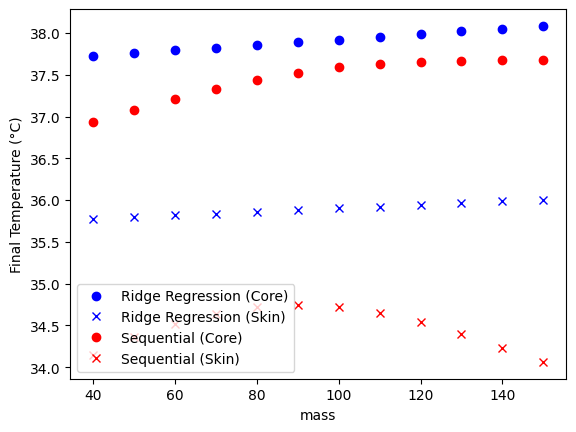

In [27]:
sensitivity_analysis('mass', [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

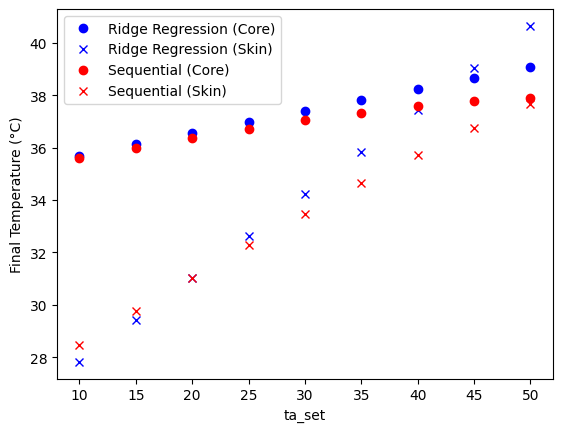

In [29]:
sensitivity_analysis('ta_set', [10, 15, 20, 25, 30, 35, 40, 45, 50])

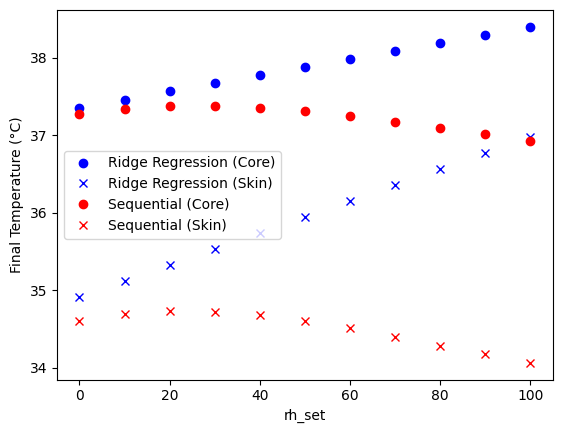

In [30]:
sensitivity_analysis('rh_set', [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])